In [142]:
import pandas as pd
data = pd.read_csv("weight-height.csv") # read the data from csv file use pandas
print(data.head(5))


  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [143]:
# Chuyển đổi đơn vị về cm và kg 
data["Height"] = data["Height"] * 2.54
data["Weight"] = data["Weight"] * 0.453592
print(data.head(5))

  Gender      Height      Weight
0   Male  187.571423  109.720985
1   Male  174.706036   73.622732
2   Male  188.239668   96.497550
3   Male  182.196685   99.809504
4   Male  177.499761   93.598619


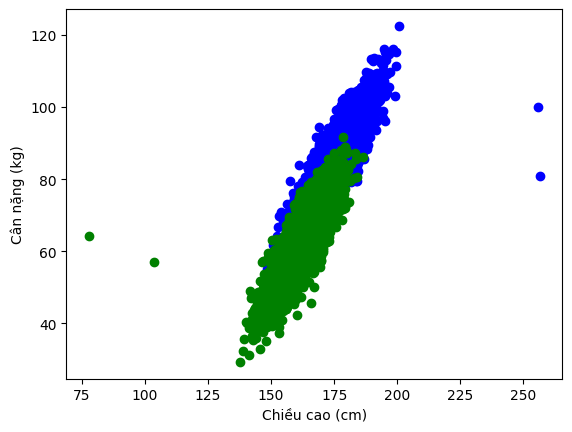

In [144]:
# Vẽ đồ thị scatter plot của dữ liệu chiều cao (x) và cân nặng (y) theo giới tính. 
import matplotlib.pyplot as plt
x=data["Height"]
y=data["Weight"]
plt.scatter(x[data['Gender']=="Male"], y[data['Gender']=="Male"], color='blue')  #Lọc chiều cao và cân nặng với giới tính = male
plt.scatter(x[data['Gender']=="Female"], y[data['Gender']=="Female"], color='green')
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Cân nặng (kg)")
plt.show()

In [145]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.values.reshape(-1,1), y)
print(f'w0 = {reg.intercept_}, w1 = {reg.coef_}')

w0 = -153.3518609678979, w1 = [1.34409474]


In [146]:
# Tính w0 và w1 theo công thức
# mean(x) trung bình của mảng x
import numpy as np
w1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
w0 = np.mean(y) - w1 * np.mean(x)

# In ra kết quả
print("w1:", w1)
print("w0:", w0)

w1: 1.3440947379390238
w0: -153.35186096789772


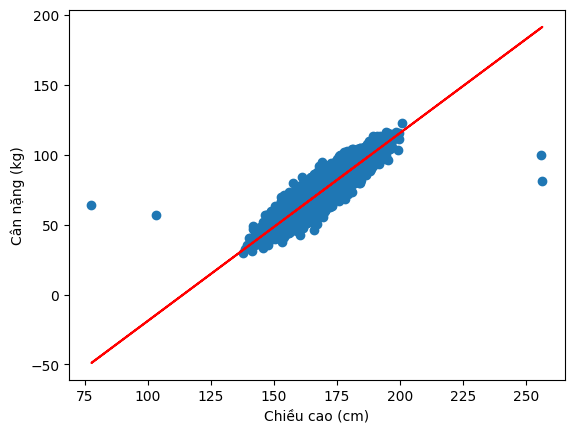

In [147]:
plt.plot(x, w0 + w1 * x, color="red")
plt.scatter(x, y)
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Cân nặng (kg)")
plt.show()

In [148]:
residuals = y - reg.predict(x.values.reshape(-1,1))
residuals_abs = np.abs(residuals)
threshold = np.percentile(residuals_abs, 90)
print(f'giá trị sai số của 10% điểm dữ liệu có sai số cao nhất.: {threshold}')

giá trị sai số của 10% điểm dữ liệu có sai số cao nhất.: 9.095584324906552


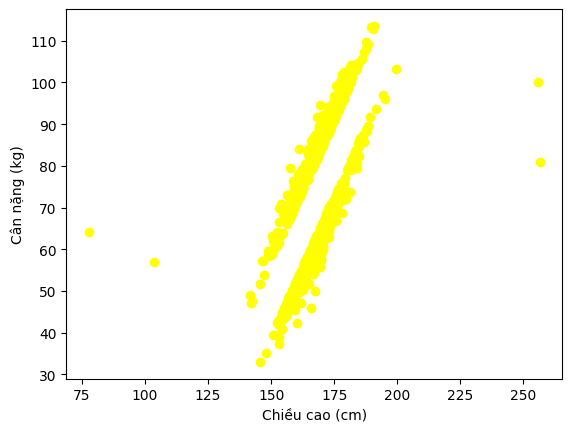

In [149]:
outliers = residuals_abs > threshold
plt.scatter(x[outliers], y[outliers], color='yellow')
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Cân nặng (kg)")
plt.show()